# Table of Contents

    1. Introduction
    2. Dataset Preprocessing
    3. Exploratory Data Analysis
    4. Correlation Analysis
    5. Regression Anaysis
    6. ANOVA
    7. Multilevel linear regression
    8. Sentiment Analysis

# <span style='color:#40908e'>|</span> 1) Introduction

Despite the growing popularity of crowdfunding, there is a noticeable research gap when it comes to investigating the impact of referencing in crowdfunding campaigns. Prior studies have not extensively explored the potential benefits and implications of employing referencing as a strategic approach in crowdfunding campaigns (Kaminski & Hopp, 2020). This gap presents an opportunity to examine the use of referencing as a signaling mechanism and its potential to enhance crowdfunding success.

The following main research question has been formulated: 

**“What is the effect of referencing on the likelihood of a crowdfunding project being fully funded?”**

To answer this main research questions the following four sub-questions have been defined:

**SQ1:** What are the most common types of references, and how do they impact crowdfunding project success?
\
**SQ2:** How does the frequency of references in the product description text impact the amount of funds raised?
\
**SQ3:** How does the frequency of references in the product description text impact the percentage of funds raised?
\
**SQ4:** How does the frequency of references in the product description text impact the likelihood of a crowdfunding project achieving full funding?
\
**SQ5:** How does the frequency of references in the product description text impact the number of backers?
\
**SQ6:** How does the frequency of references in the product description text impact the sentiment of the comments received?
\
**SQ7:** Are there significant differences in the use of referencing and success rates among various categories of crowdfunding projects?
\
**SQ8:** How do different goal types of crowdfunding vary in terms of their use of referencing and their success rates?



# <span style='color:#40908e'>|</span> 2) Data Preprocessing

In [2]:
import pandas as pd
import re

# Libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Libraries for Regression Analysis and Anova
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression

# Library for Multilevel modelling
from pymer4.models import Lmer

# Libraries for NMF
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import NMF

# Library for Network Analysis
import networkx as nx

# Libraries for Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Library for standardizing
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('scrape_output_raw.csv', sep=';')

In [4]:
df

,status,title,tagline,creator,num_campaign,location,amount_funded,amount_backers,percentage,goal_type,days_left,story,tags,discussion
0,FUNDING,Hover Camera X1: Pocket-Sized Self-Flying Camera,Fly Hands Free|Palm Takeoff | Intelligent Flig...,HOVER CAMERA,1 Campaign |,"Palo Alto, United States","€513,980","1,650 backers","11256% of €4,566",Flexible Goal,9 days left,Shipping\nThe project team has begun shipping ...,Tags for this project\nTECH & INNOVATION CAMER...,You must be a backer to join the discussion. L...
1,FUNDING,Project UN: Taradene - Epic Sci-Fi RPG Video Game,Ground-breaking story-driven sci-fi RPG led by...,SKC Games Studio,1 Campaign |,"Haverhill, United Kingdom","€8,565",210 backers,"3% of €233,703",Flexible Goal,38 days left,A next generation open-world Sci-Fi RPG featur...,Tags for this project\nCREATIVE WORKS VIDEO GA...,You must be a backer to join the discussion. L...
2,INDEMAND,FIENDISH: Chapter 2: Strangers,A dark fantasy comic about the mysteries that ...,Irene Strychalski,4 Campaigns |,"Atlanta, United States","€162,264","by 2,193 backers",not_available,not_available,not_available,Highlights\nStar Arts & Film\nFlag 4 Projects\...,Tags for this project\nCREATIVE WORKS COMICS F...,You must be a backer to join the discussion. L...
3,FUNDING,Cooking Through Columbus,A cookbook and the ultimate guide to eating th...,Tim Trad,8 Campaigns |,"Columbus, United States","€5,582",70 backers,"40% of €13,698",Flexible Goal,30 days left,Highlights\nStar Arts & Film\nFlag 8 Projects\...,Tags for this project\nCREATIVE WORKS WRITING ...,You must be a backer to join the discussion. L...
4,FUNDING,Clouds Go Away Student Short,A Dystopian Psychological Thriller that will b...,Isabel Fleck,1 Campaign |,"Vancouver, Canada",€571,8 backers,82% of €691,Flexible Goal,48 days left,Short Summary\nFor years depression has been e...,Tags for this project\nCREATIVE WORKS FILM STU...,You must be a backer to join the discussion. L...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,CLOSED,WOKE - Body Snatchers-like Sci-Fi Horror,When her activist friends inexplicably switch ...,Ron Bonk,16 Campaigns |,"Liverpool, United States","€3,468",by 74 backers,Error,Error,not_available,Highlights\n16 Projects\nGoal hit - thank you!...,Tags for this project\nCREATIVE WORKS FILM HOR...,You must be a backer to join the discussion. L...
728,CLOSED,Nusantara: Bermuda Triangle - Visual Novel,"An epic fantasy adventure, mystery, drama, and...",SweetChiel,1 Campaign |,"Tangerang, Indonesia","€2,303",91 backers,"72% of €3,196",Flexible Goal,not_available,"Overview\nAfter the success of ""Nusantara: Leg...",Tags for this project\nCREATIVE WORKS VIDEO GA...,Error
729,CLOSED,"Inner Child, a new thriller horror feature film",Plagued by night terrors and visions of a dark...,Natalie Rodriguez,2 Campaigns |,"Los Angeles, United States","€7,369",52 backers,"53% of €13,698",Flexible Goal,not_available,Highlights\n2 Projects\n THE STORY\nINNER CHIL...,Tags for this project\nCREATIVE WORKS FILM HOR...,You must be a backer to join the discussion. L...
730,INDEMAND,Yule Log - The Movie!,Christmas horrors from legendary filmmaker Mar...,Ron Bonk,16 Campaigns |,"liverpool, United States","€4,306",by 76 backers,not_available,not_available,not_available,Highlights\nFlag 16 Projects\nWe did it! Thank...,Tags for this project\nCREATIVE WORKS FILM HOR...,You must be a backer to join the discussion. L...


In [5]:
df[df == 'Error'].count()

status             0
title              0
tagline            0
creator            0
num_campaign       0
location           0
amount_funded      0
amount_backers     0
percentage         7
goal_type          7
days_left          0
story              0
tags               0
discussion        29
dtype: int64

Some projects use a "comments" tab instead of a "discussion" tab. In these cases, the scraper fills the "discussion" column with "Error." The difference is that commenting on the "discussion" tab requires being a backer, while the "comments" tab only requires having an account. Since our research focuses on backer sentiment, we did not analyze the "comments" tab. After reviewing the pages of the remaining 7 projects with errors, it was evident that they lacked information regarding percentages and goal types, making them exceptions among the projects we examined.

In [6]:
# Dataframe without the Error
df = df.drop(df.loc[(df['discussion'] == "Error") | (df['percentage'] == "Error") | (df['goal_type'] == "Error")].index)

In [7]:
# Percentage Clean
# Replacing the 'not_available' data points for 100%, since they only occur in INDEMAND projects which have guaranteed at least 100% funding
df['percentage'] = df['percentage'].replace('not_available', "100")
# Create a new column 'percentage_decimal' to store the converted values
df['percentage_decimal'] = df['percentage'].str.extract(r'(\d+)').astype(float) / 100

# Amount of Backers Clean
# Create a new column 'backers_numeric' to store the extracted numerical values
df['backers_numeric'] = df['amount_backers'].str.extract(r'(\d+)').astype(int)

# Number of Campaign Clean
# Create a new column 'backers_numeric' to store the extracted numerical values
df['campaigns_numeric'] = df['num_campaign'].str.extract(r'(\d+)').astype(int)

# Amount Funded Clean
# Remove commas from 'amount_funded' column
df['amount_funded'] = df['amount_funded'].str.replace(',', '')
# Create a new column 'price_numeric' to store the values without the euro sign
df['funded_numeric'] = df['amount_funded'].str.replace('€', '').astype(int)

# Days Left Clean
# Create a new column 'days_numeric' to store the extracted numeric values
df['days_numeric'] = df['days_left'].str.extract(r'(\d+)').fillna(0)
# Search for columns with 'hours' and assign the numeric value 1
df.loc[df['days_left'].str.contains('hours'), 'days_numeric'] = 1
df['days_numeric'] = df['days_numeric'].astype(int)

# Status Clean
# Create a new column 'success' to store the binary values
df['success'] = 0
# Assigning 1 to the projects that reached their funding goal. The projects that failed already have a 0 assigned.
df.loc[df['status'] == 'INDEMAND', 'success'] = 1
df.loc[(df['status'] == 'FUNDING') & (df['percentage_decimal'] >= 1), 'success'] = 1

In [8]:
# To focus on the most current data, we will narrow our analysis to projects with 7 days or less remaining in the 'FUNDING' status. 
# This approach ensures that we work with relevant data while minimizing potential data loss.

# Print the number of projects before filter
print("Number of projects before filter: ", len(df))

# Filter the dataframe based on status and days numeric
df = df[~((df['status'] == 'FUNDING') & (df['days_numeric'] > 7))]

# Print the number of projects after filter
print("Number of projects after filter: ", len(df))

Number of projects before filter:  697
Number of projects after filter:  361


In [9]:
# Splitting Tags into Main Tags and Secondary Tags

# Create separate lists for main tags and secondary tags
main_tags = ['TECH & INNOVATION', 'CREATIVE WORKS', 'COMMUNITY PROJECTS']
secondary_tags = [
    'AUDIO', 'CAMERA GEAR', 'EDUCATION', 'ENERGY & GREEN TECH', 'FASHION & WEARABLES',
    'FOOD & BEVERAGES', 'HEALTH & FITNESS', 'HOME', 'PHONES & ACCESSORIES', 'PRODUCTIVITY',
    'TRANSPORTATION', 'TRAVEL & OUTDOORS', 'ART', 'COMICS', 'DANCE & THEATER', 'FILM', 'MUSIC',
    'PHOTOGRAPHY', 'PODCASTS, BLOGS & VLOGS', 'TABLETOP GAMES', 'VIDEO GAMES',
    'WEB SERIES & TV SHOWS', 'WRITING & PUBLISHING', 'CULTURE', 'ENVIRONMENT', 'HUMAN RIGHTS',
    'LOCAL BUSINESSES', 'WELLNESS'
]

# Create new columns 'main_tag' and 'secondary_tag' and initialize them with None
df['main_tag'] = 'no_main_tag'
df['secondary_tag'] = 'no_secondary_tag'

# Iterate over the DataFrame rows
for index, row in df.iterrows():
    tags = row['tags']
    
    # Check for main tags and update 'main_tag' column
    for tag in main_tags:
        if tag in tags:
            df.at[index, 'main_tag'] = tag
    
    # Check for secondary tags and update 'secondary_tag' column
    for tag in secondary_tags:
        if tag in tags:
            df.at[index, 'secondary_tag'] = tag

In [10]:
# Choosing Theme Color
crest = sns.color_palette("crest")
print(crest.as_hex())
crest

['#7dba91', '#59a590', '#40908e', '#287a8c', '#1c6488', '#254b7f']


[(0.48942421, 0.72854938, 0.56751036),
 (0.34892097, 0.64828676, 0.56513633),
 (0.24929311, 0.56486397, 0.5586654),
 (0.15615526, 0.47913212, 0.54850526),
 (0.11131735, 0.39155635, 0.53422678),
 (0.14573579, 0.29354139, 0.49847009)]

# <span style='color:#40908e'>|</span> 3) Extracting References from Story

### References
Using Word Structures (e.g. Referenced by, Citated by, Inspired by etc.)

In [11]:
# Creating a list of keywords for References on Prior Work
works = [
    'adapted from',
    'based on',
    'borrows elements from',
    'borrowed from',
    'built upon',
    'citated by',
    'citated from',
    'derived from',
    'draws from',
    'draws upon',
    'echoes',
    'expands upon',
    'in homage to',
    'in the style of',
    'influenced by',
    'influenced by the style of',
    'inspiration from',
    'inspired by',
    'inspired by the works of',
    'incorporates elements of',
    'modeled after',
    'pays homage to',
    'references by',
    'references from',
    'resembles the works of',
    'reminiscent of',
    'takes cues from'
]

In [12]:
# Creating a code for matching and counting the references

# Initialize 'num_references' column with zeros
df['num_references'] = 0
df['desc_references'] = ''

# Iterate over the works list and increment 'num_references' and build 'desc_references' list for each occurrence
for work in works:
    pattern = rf'([^\.]*{re.escape(work)}[^\.]*)'
    match = df['story'].str.contains(work, flags=re.IGNORECASE)
    df.loc[match, 'num_references'] += 1
    df.loc[match, 'desc_references'] += df.loc[match, 'story'].str.extract(pattern, expand=False) + ', '

# Remove trailing comma and whitespace in 'desc_references'
df['desc_references'] = df['desc_references'].str.rstrip(', ')

# Fill the NaNs in 'desc_references'
df['desc_references'] = df['desc_references'].fillna('')

# Creating a column for binary values for references, 0 for no references, 1 for containing 1 or more references
df['references_binary'] = (df['num_references'] > 0).astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 2 to 731
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   status              361 non-null    object 
 1   title               361 non-null    object 
 2   tagline             361 non-null    object 
 3   creator             361 non-null    object 
 4   num_campaign        361 non-null    object 
 5   location            361 non-null    object 
 6   amount_funded       361 non-null    object 
 7   amount_backers      361 non-null    object 
 8   percentage          361 non-null    object 
 9   goal_type           361 non-null    object 
 10  days_left           361 non-null    object 
 11  story               361 non-null    object 
 12  tags                361 non-null    object 
 13  discussion          361 non-null    object 
 14  percentage_decimal  361 non-null    float64
 15  backers_numeric     361 non-null    int32  
 16  campaign

In [14]:
references_df = df.loc[df['num_references'] > 0]
print("Total number of projects with at least one reference: ", len(references_df), '\n', sep='')
print("The number of projects corresponding to the number of references:\n", references_df['num_references'].value_counts().to_string(), '\n', sep='')
print("The number of projects that have at least one references corresponding to each status:\n", references_df['status'].value_counts().to_string(), '\n', sep='')

Total number of projects with at least one reference: 96

The number of projects corresponding to the number of references:
1    87
2     9

The number of projects that have at least one references corresponding to each status:
INDEMAND    61
CLOSED      18
FUNDING     17



### Finding reference styles using NMF modeling

In [15]:
# Cleaning the column desc_references
# Replacing \n into white space
df['desc_references'] = df['desc_references'].str.replace(".\n", " ", regex=True)
df['desc_references'] = df['desc_references'].str.replace("\n", " ", regex=True)

# Preparing new dataframe for NMF
nmf_df = df.loc[df['num_references'] >= 1, ['desc_references', 'num_references']].copy()

In [16]:
# Turning the text into vector
text = nmf_df['desc_references'].tolist()

In [17]:
# Loading the english language model of spacy
nlp = spacy.load("en_core_web_sm")

In [18]:
# Perform tokenization
docs = [nlp.make_doc(x) for x in text]

In [19]:
# Using regex to check if text contains digits or punctuations
digit_re = re.compile('^([0-9]|[\\.,~#])*$')

In [20]:
# Processing the text into cleaned tokens
tokens_cleaned = []
for doc in docs:
    new_tokens = []
    for token in doc:
        if not token.is_stop and not token.is_punct and not re.match(digit_re, token.text):
            new_tokens.append(token.text.lower())
    tokens_cleaned.append(new_tokens)

In [21]:
# To utilize the tokens that we have already calculated, a dummy function must be passed to the tokenizer and preprocessor parameters of count vectorizer.
def dummy(doc):
    return doc

count_vectorizer = CountVectorizer(
    tokenizer=dummy,
    preprocessor=dummy,
    max_features=5000
    )

frequency_matrix = count_vectorizer.fit_transform(tokens_cleaned)

In [22]:
tfd_idf_trans = TfidfTransformer()
tf_idf_matrix = tfd_idf_trans.fit_transform(frequency_matrix)

In [23]:
# we use 10 as the n_components here
model = NMF(n_components=4, init='nndsvd', max_iter=1000)

# fit the model
model.fit(X=tf_idf_matrix)

NMF(init='nndsvd', max_iter=1000, n_components=4)

In [24]:
# the model.components_ matrix is the H matrix mapping topics to word weights
model.components_
model.components_.shape

(4, 1040)

In [25]:
def get_topics(model, n_top_words):
    feature_names = count_vectorizer.get_feature_names_out()
    d = {}
    for i in range(model.n_components):
        # model.components_ matrix contains the matrix H where topics are 
        words_ids = model.components_[i].argsort()[:-n_top_words - 1:-1]
        words = [feature_names[key] for key in words_ids]
        d['Topic # ' + '{:02d}'.format(i+1)] = words
    return pd.DataFrame(d)

In [26]:
get_topics(model, 20)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04
0,shipping,film,based,work
1,costs,short,,right
2,estimates,inspired,design,seen
3,based,life,experience,prior
4,actual,created,select,great
5,,,material,humor
6,current,style,making,sense
7,campaign,true,,ideas
8,vary,patsy,technology,evan
9,perks,experiences,body,amazing


We see some coeherence in the topics that the NMF model has identified. In particular:

- Topic 01 can be identified as Informational References
- Topic 02 can be identified as Inspiration References.
- Topic 03 can be identified as Experience References.
- Topic 04 can be identified as Prior Work References.

In [27]:
# Adding the topics to the Dataframe
document_topics = model.transform(X=tf_idf_matrix)
document_topics = pd.DataFrame(document_topics)
main_topic = document_topics.idxmax(axis=1)
topics = [str(x) for x in range(4)]
main_topic = main_topic.apply(lambda x: topics[x])
topic_df = pd.DataFrame(main_topic)

In [28]:
# Printing the value counts of each topic
print(topic_df.value_counts())

2    35
0    31
1    22
3     8
dtype: int64


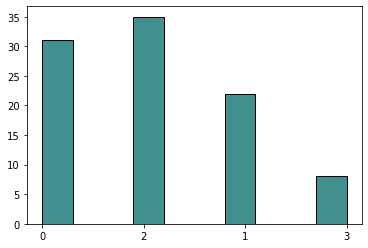

In [29]:
# Histogram of the projects with topics
plt.hist(topic_df, bins=10, color='#40908e', edgecolor='black')
plt.show()

# <span style='color:#40908e'>|</span> 3) Exploratory Data Analysis

In [30]:
df.describe()

,percentage_decimal,backers_numeric,campaigns_numeric,funded_numeric,days_numeric,success,num_references,references_binary
count,361.000000,361.000000,361.000000,3.610000e+02,361.000000,361.000000,361.000000,361.000000
mean,1.523712,156.362881,3.268698,2.004767e+05,0.675900,0.645429,0.290859,0.265928
std,8.809414,230.735030,5.106895,6.090599e+05,1.621968,0.479047,0.506787,0.442439
min,0.000000,1.000000,1.000000,9.900000e+01,0.000000,0.000000,0.000000,0.000000
25%,0.520000,12.000000,1.000000,4.169000e+03,0.000000,0.000000,0.000000,0.000000
50%,1.000000,52.000000,1.000000,1.423100e+04,0.000000,1.000000,0.000000,0.000000
75%,1.000000,166.000000,3.000000,1.249850e+05,0.000000,1.000000,1.000000,1.000000
max,153.590000,983.000000,43.000000,4.990870e+06,7.000000,1.000000,2.000000,1.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 2 to 731
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   status              361 non-null    object 
 1   title               361 non-null    object 
 2   tagline             361 non-null    object 
 3   creator             361 non-null    object 
 4   num_campaign        361 non-null    object 
 5   location            361 non-null    object 
 6   amount_funded       361 non-null    object 
 7   amount_backers      361 non-null    object 
 8   percentage          361 non-null    object 
 9   goal_type           361 non-null    object 
 10  days_left           361 non-null    object 
 11  story               361 non-null    object 
 12  tags                361 non-null    object 
 13  discussion          361 non-null    object 
 14  percentage_decimal  361 non-null    float64
 15  backers_numeric     361 non-null    int32  
 16  campaign

In [32]:
print("Skewness of 'num_references':", df['num_references'].skew())
print("Skewness of 'funded_numeric':", df['funded_numeric'].skew())
print("Skewness of 'backers_numeric':", df['backers_numeric'].skew())
print("Skewness of 'percentage_decimal':", df['percentage_decimal'].skew())

Skewness of 'num_references': 1.4901741827645671
Skewness of 'funded_numeric': 5.60827891981981
Skewness of 'backers_numeric': 1.829406887483727
Skewness of 'percentage_decimal': 15.432075228585429


In [33]:
# Standardize the variables

# List to loop through
columns_to_transform = ['percentage_decimal', 'backers_numeric', 'funded_numeric']

# Apply natural logarithm transformation to selected columns and create new columns with standardized values
for column in columns_to_transform:
    new_column_name = column + '_standardized'
    df[new_column_name] = np.log1p(df[column])

In [34]:
print("Skewness of 'references_binary':", df['references_binary'].skew())
print("Skewness of 'funded_numeric':", df['funded_numeric_standardized'].skew())
print("Skewness of 'backers_numeric':", df['backers_numeric_standardized'].skew())
print("Skewness of 'percentage_decimal':", df['percentage_decimal_standardized'].skew())

Skewness of 'references_binary': 1.0639924686939946
Skewness of 'funded_numeric': 0.2569769740469063
Skewness of 'backers_numeric': -0.14193917552840796
Skewness of 'percentage_decimal': 5.433267750933866


In [35]:
print("The number of data corresponding to each status:\n", df['status'].value_counts().to_string(), '\n', sep='')
print("The number of data corresponding to each funding mechanism:\n", df['goal_type'].value_counts().to_string(), '\n', sep='')
print("The number of data corresponding to each main tag:\n", df['main_tag'].value_counts().to_string(), '\n', sep='')
print("The number of data corresponding to each secondary tag:\n", df['secondary_tag'].value_counts().to_string(), sep='')

The number of data corresponding to each status:
INDEMAND    213
CLOSED       75
FUNDING      73

The number of data corresponding to each funding mechanism:
not_available    213
Flexible Goal    146
Fixed Goal         2

The number of data corresponding to each main tag:
CREATIVE WORKS        198
TECH & INNOVATION     150
COMMUNITY PROJECTS     13

The number of data corresponding to each secondary tag:
FILM                     113
ART                       34
MUSIC                     27
TRAVEL & OUTDOORS         21
no_secondary_tag          18
HOME                      15
FOOD & BEVERAGES          15
PRODUCTIVITY              14
COMICS                    12
TRANSPORTATION            11
WRITING & PUBLISHING      10
DANCE & THEATER           10
FASHION & WEARABLES        8
HEALTH & FITNESS           7
VIDEO GAMES                6
PHONES & ACCESSORIES       6
EDUCATION                  5
CAMERA GEAR                5
TABLETOP GAMES             4
AUDIO                      4
LOCAL BUSINE

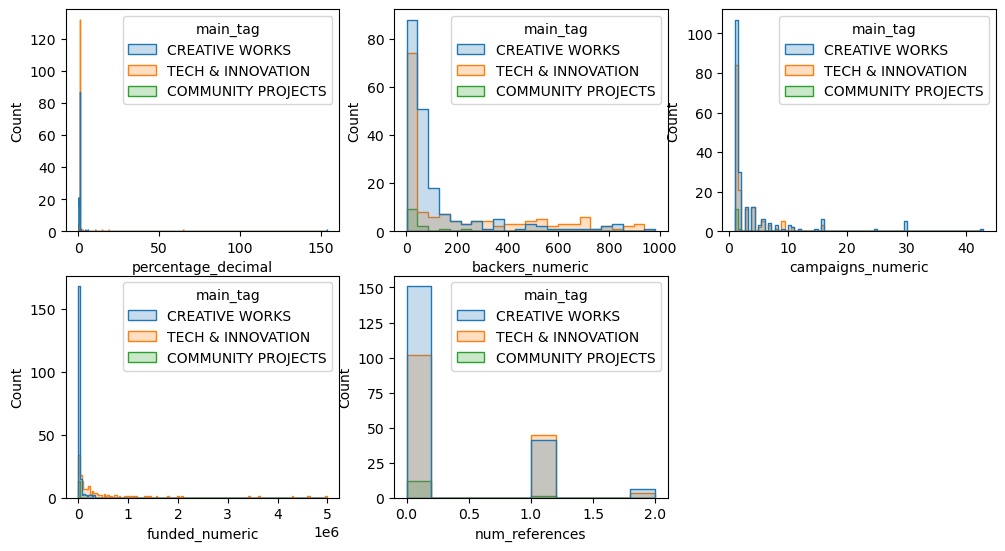

In [36]:
# Histograms
fig = plt.figure(figsize=(12, 10), dpi=100)

plt.subplot(3,3,1)
sns.histplot(data=df, x="percentage_decimal", hue="main_tag", element="step")

plt.subplot(3,3,2)
sns.histplot(data=df, x="backers_numeric", hue="main_tag", element="step")

plt.subplot(3,3,3)
sns.histplot(data=df, x="campaigns_numeric", hue="main_tag", element="step")

plt.subplot(3,3,4)
sns.histplot(data=df, x="funded_numeric", hue="main_tag", element="step")

plt.subplot(3,3,5)
sns.histplot(data=df, x="num_references", hue="main_tag", element="step")

plt.show()

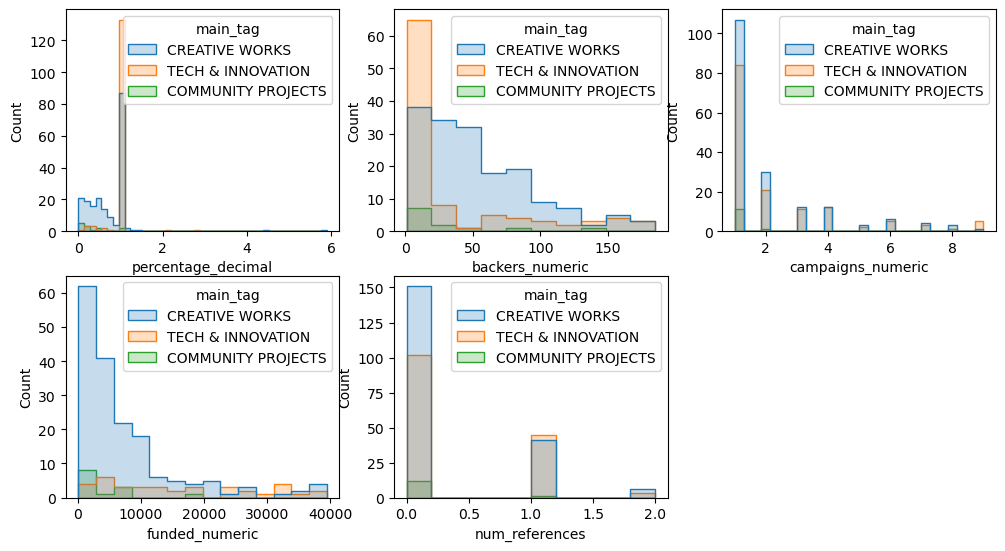

In [37]:
# Histograms to look at the most dense part and without outliers
fig = plt.figure(figsize=(12, 10), dpi=100)

plt.subplot(3,3,1)
sns.histplot(data=df[df["percentage_decimal"] < 10], x="percentage_decimal", hue="main_tag", element="step")

plt.subplot(3,3,2)
sns.histplot(data=df[df["backers_numeric"] < 200], x="backers_numeric", hue="main_tag", element="step")

plt.subplot(3,3,3)
sns.histplot(data=df[df["campaigns_numeric"] < 10], x="campaigns_numeric", hue="main_tag", element="step")

plt.subplot(3,3,4)
sns.histplot(data=df[df["funded_numeric"] < 40000], x="funded_numeric", hue="main_tag", element="step")

plt.subplot(3,3,5)
sns.histplot(data=df, x="num_references", hue="main_tag", element="step")

plt.show()

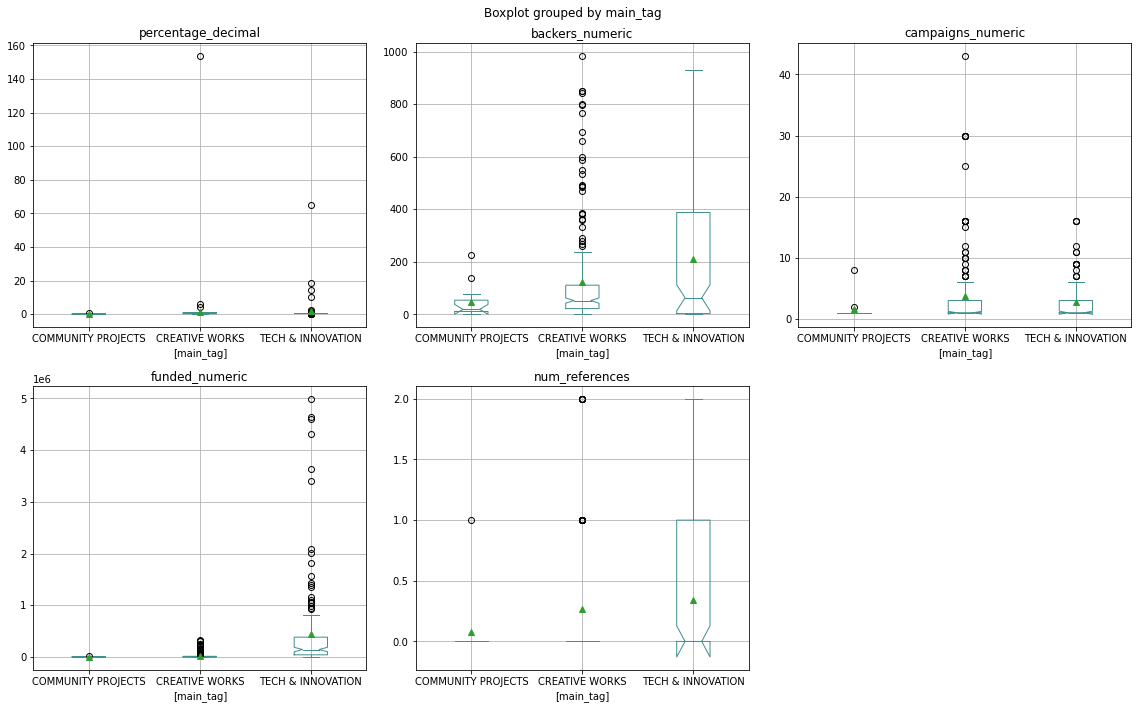

In [38]:
# Boxplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

df.boxplot(["percentage_decimal"], by = ["main_tag"], ax=axes[0, 0], color='#40908e',
                     showmeans = True, notch = True)

df.boxplot(["backers_numeric"], by = ["main_tag"], ax=axes[0, 1], color='#40908e',
                     showmeans = True, notch = True)
df.boxplot(["campaigns_numeric"], by = ["main_tag"], ax=axes[0, 2], color='#40908e',
                     showmeans = True, notch = True)

df.boxplot(["funded_numeric"], by = ["main_tag"], ax=axes[1, 0], color='#40908e',
                     showmeans = True, notch = True)

df.boxplot(["num_references"], by = ["main_tag"], ax=axes[1, 1], color='#40908e',
                     showmeans = True, notch = True)

# Hide the empty subplot
axes[1, 2].remove()

plt.tight_layout()
plt.show()

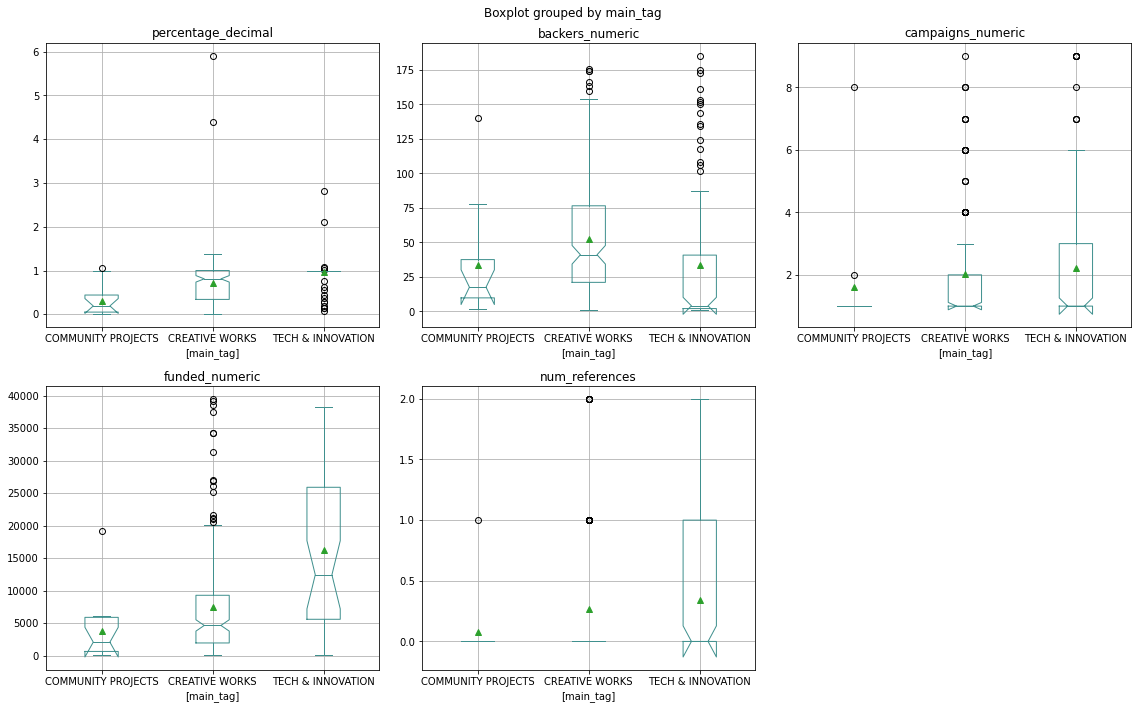

In [39]:
# Boxplots to look at the most dense part and without outliers
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

df[df["percentage_decimal"] < 10].boxplot(["percentage_decimal"], by = ["main_tag"], ax=axes[0, 0], color='#40908e',
                     showmeans = True, notch = True)

df[df["backers_numeric"] < 200].boxplot(["backers_numeric"], by = ["main_tag"], ax=axes[0, 1], color='#40908e',
                     showmeans = True, notch = True)
df[df["campaigns_numeric"] < 10].boxplot(["campaigns_numeric"], by = ["main_tag"], ax=axes[0, 2], color='#40908e',
                     showmeans = True, notch = True)

df[df["funded_numeric"] <= 40000].boxplot(["funded_numeric"], by = ["main_tag"], ax=axes[1, 0], color='#40908e',
                     showmeans = True, notch = True)

df.boxplot(["num_references"], by = ["main_tag"], ax=axes[1, 1], color='#40908e',
                     showmeans = True, notch = True)

# Hide the empty subplot
axes[1, 2].remove()

plt.tight_layout()
plt.show()

# <span style='color:#40908e'>|</span> 4) Correlation Analysis

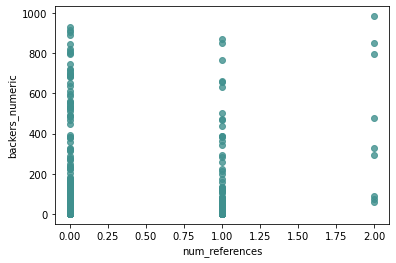

In [40]:
# Create scatterplot
sns.regplot(data = df, x = 'num_references', y = 'backers_numeric', fit_reg = False, color='#40908e')
plt.show()

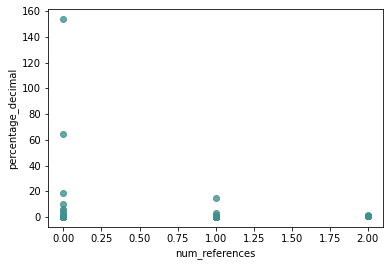

In [41]:
# Create scatterplot
sns.regplot(data = df, x = 'num_references', y = 'percentage_decimal', fit_reg = False, color='#40908e')
plt.show()

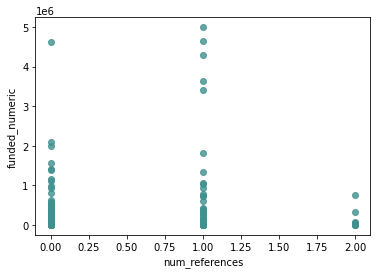

In [42]:
# Create scatterplot
sns.regplot(data = df, x = 'num_references', y = 'funded_numeric', fit_reg = False, color='#40908e')
plt.show()

In [43]:
# Preparing the variables for the Correlation Matrix
correlation_matrix = df[['num_references', 'backers_numeric', 'percentage_decimal', 'funded_numeric']].corr()
correlation_matrix['num_references'].sort_values(ascending=False)

num_references        1.000000
funded_numeric        0.149857
backers_numeric       0.089673
percentage_decimal   -0.035826
Name: num_references, dtype: float64

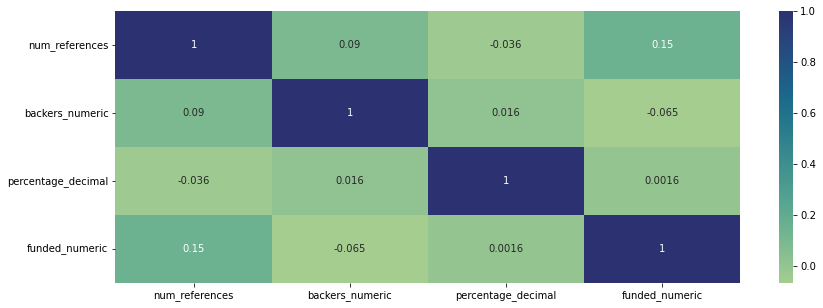

In [44]:
# Heatmap Correlation Matrix
plt.figure(figsize=(14,5))
sns.heatmap(correlation_matrix, cbar=True, annot=True, cmap='crest')
plt.show()

# <span style='color:#40908e'>|</span> 5) Regression Analysis

## <span style='color:#40908e'>|</span> 5.1) Linear Regression

In [45]:
# Removing percentage outliers that have the value 3, which is 300% funded
percentage_df = df[df['percentage_decimal'] <= 3].copy()

The average num_references: 0.268361581920904
The average percentage funded: 0.5550836361198347
B0 = 0.5445857284500645
B1 = [0.03911852]
Coefficient of Determination = 0.0058511285600940655


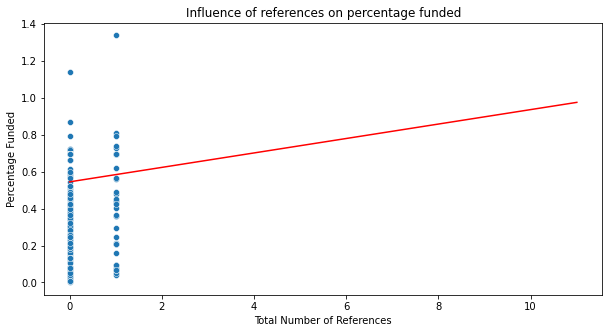

In [46]:
# Linear regression of the influence of references on percentage funded
num_references = percentage_df.references_binary.to_list()
percentage_decimal = percentage_df.percentage_decimal_standardized.to_list()

Average_num_references = np.mean(num_references)
Average_percentage_decimal = np.mean(percentage_decimal)
print("The average num_references:", Average_num_references)
print("The average percentage funded:",Average_percentage_decimal)

# Using LinearRegression to calculate the B0, B1 and R-square
num_references_data = np.array(num_references).reshape((-1,1))
percentage_decimal_data = np.array(percentage_decimal)
model1 = LinearRegression().fit(num_references_data, percentage_decimal_data)
b0 = model1.intercept_
b1 = model1.coef_
print("B0 =",b0)
print("B1 =",b1)
r_squared = model1.score(num_references_data, percentage_decimal_data)
print("Coefficient of Determination =",r_squared)

# Plotting the graph
s = percentage_df
x = np.linspace(0, 11, 100)
y = b0 + (b1*x)
plt.figure(figsize=(10,5))
sns.scatterplot(data = s, x = s["references_binary"], y = s["percentage_decimal_standardized"])
plt.plot(x, y, 'r',)
plt.xlabel("Total Number of References")
plt.ylabel("Percentage Funded")
plt.title("Influence of references on percentage funded")

plt.show()

In [47]:
# Adding a constant term to the independent variable
num_references_data = sm.add_constant(num_references_data)

# Creating and fitting the OLS (Ordinary Least Squares) model
model = sm.OLS(percentage_decimal_data, num_references_data)
results = model.fit()

# Accessing the p-value for the coefficient
p_value = results.pvalues[1]

print("P-value:", p_value)

P-value: 0.15094095578173242


The average num_references: 0.2857142857142857
The average percentage funded: 1.5475087579552436
B0 = 1.6897787685891672
B1 = [-0.49794504]
Coefficient of Determination = 0.03374298323864566


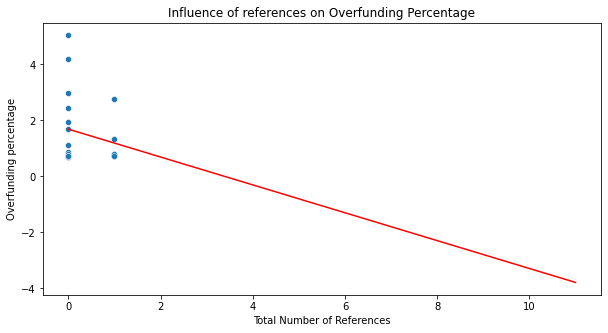

In [48]:
# Linear regression of the influence of references on percentage overfunding

# Creating dataframe for projects with overfunding (higher than 100%)
overfunding_df = df[df['percentage_decimal'] > 1]

num_references = overfunding_df.references_binary.to_list()
overfunding_decimal = overfunding_df.percentage_decimal_standardized.to_list()

Average_num_references = np.mean(num_references)
Average_overfunding_decimal = np.mean(overfunding_decimal)
print("The average num_references:", Average_num_references)
print("The average percentage funded:",Average_overfunding_decimal)

# Using LinearRegression to calculate the B0, B1 and R-square
num_references_data = np.array(num_references).reshape((-1,1))
overfunding_decimal_data = np.array(overfunding_decimal)
model1 = LinearRegression().fit(num_references_data, overfunding_decimal_data)
b0 = model1.intercept_
b1 = model1.coef_
print("B0 =",b0)
print("B1 =",b1)
r_squared = model1.score(num_references_data, overfunding_decimal_data)
print("Coefficient of Determination =",r_squared)

# Plotting the graph
s = overfunding_df
# s = df[df["percentage_decimal"] < 500000] # Code incase for outliers removal
x = np.linspace(0, 11, 100)
y = b0 + (b1*x)
plt.figure(figsize=(10,5))
sns.scatterplot(data = s, x = s["references_binary"], y = s["percentage_decimal_standardized"])
plt.plot(x, y, 'r',)
plt.xlabel("Total Number of References")
plt.ylabel("Overfunding percentage")
plt.title("Influence of references on Overfunding Percentage")

plt.show()

In [49]:
# Adding a constant term to the independent variable
num_references_data = sm.add_constant(num_references_data)

# Creating and fitting the OLS (Ordinary Least Squares) model
model = sm.OLS(overfunding_decimal_data, num_references_data)
results = model.fit()

# Accessing the p-value for the coefficient
p_value = results.pvalues[1]

print("P-value:", p_value)

P-value: 0.4254175882397021


The average num_references: 0.2659279778393352
The average number of backers: 3.835970963545064
B0 = 3.8536003774415692
B1 = [-0.06629394]
Coefficient of Determination = 0.00027454316145691937


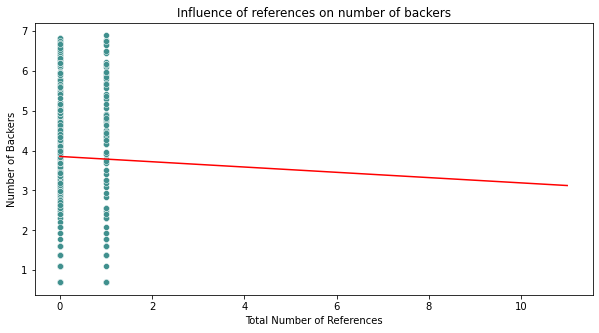

In [93]:
# Linear regression of the influence of references on number of backers
num_references = df.references_binary.to_list()
backers_numeric = df.backers_numeric_standardized.to_list()

Average_num_references = np.mean(num_references)
Average_backers_numeric = np.mean(backers_numeric)
print("The average num_references:", Average_num_references)
print("The average number of backers:",Average_backers_numeric)

# Using LinearRegression to calculate the B0, B1 and R-square
num_references_data = np.array(num_references).reshape((-1,1))
backers_numeric_data = np.array(backers_numeric)
model1 = LinearRegression().fit(num_references_data, backers_numeric_data)
b0 = model1.intercept_
b1 = model1.coef_
print("B0 =",b0)
print("B1 =",b1)
r_squared = model1.score(num_references_data, backers_numeric_data)
print("Coefficient of Determination =",r_squared)

# Plotting the graph
s = df
x = np.linspace(0, 11, 100)
y = b0 + (b1*x)
plt.figure(figsize=(10,5))
sns.scatterplot(data = s, x = s["references_binary"], y = s["backers_numeric_standardized"], color='#40908e')
plt.plot(x, y, 'r',)
plt.xlabel("Total Number of References")
plt.ylabel("Number of Backers")
plt.title("Influence of references on number of backers")

plt.show()

In [94]:
# Adding a constant term to the independent variable
num_references_data = sm.add_constant(num_references_data)

# Creating and fitting the OLS (Ordinary Least Squares) model
model = sm.OLS(backers_numeric_data, num_references_data)
results = model.fit()

# Accessing the p-value for the coefficient
p_value = results.pvalues[1] 

print("P-value:", p_value)

P-value: 0.7537130127356504


The average num_references: 0.2659279778393352
The average amount funded: 9.935923837830948
B0 = 9.7125790853437
B1 = [0.83986933]
Coefficient of Determination = 0.027635408361076363


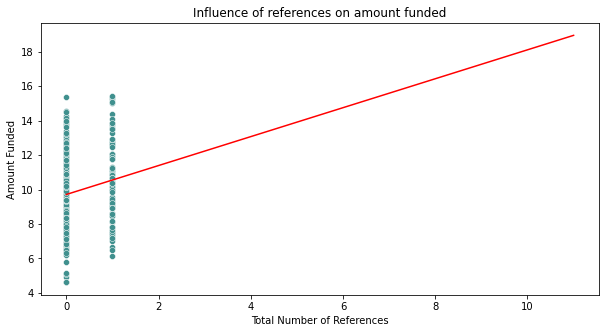

In [52]:
# linear regression of the influence of references on amount funded
num_references = df.references_binary.to_list()
funded_numeric = df.funded_numeric_standardized.to_list()

Average_num_references = np.mean(num_references)
Average_funded_numeric = np.mean(funded_numeric)
print("The average num_references:", Average_num_references)
print("The average amount funded:",Average_funded_numeric)

# Using LinearRegression to calculate the B0, B1 and R-square
num_references_data = np.array(num_references).reshape((-1,1))
funded_numeric_data = np.array(funded_numeric)
model1 = LinearRegression().fit(num_references_data, funded_numeric_data)
b0 = model1.intercept_
b1 = model1.coef_
print("B0 =",b0)
print("B1 =",b1)
r_squared = model1.score(num_references_data, funded_numeric_data)
print("Coefficient of Determination =",r_squared)

# Plotting the graph
s = df
# s = df[df["funded_numeric"] < 500000] # Code incase for outliers removal
x = np.linspace(0, 11, 100)
y = b0 + (b1*x)
plt.figure(figsize=(10,5))
sns.scatterplot(data = s, x = s["references_binary"], y = s["funded_numeric_standardized"], color='#40908e')
plt.plot(x, y, 'r',)
plt.xlabel("Total Number of References")
plt.ylabel("Amount Funded")
plt.title("Influence of references on amount funded")

plt.show()

In [53]:
# Adding a constant term to the independent variable
num_references_data = sm.add_constant(num_references_data)

# Creating and fitting the OLS (Ordinary Least Squares) model
model = sm.OLS(funded_numeric_data, num_references_data)
results = model.fit()

# Accessing the p-value for the coefficient
p_value = results.pvalues[1]  # Assuming the coefficient you're interested in is at index 1

print("P-value:", p_value)

P-value: 0.0015261214488191525


## <span style='color:#40908e'>|</span> 5.2) Logistic Regression

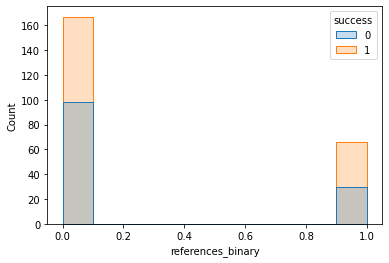

In [54]:
# Histogram plot of number of references and the likelihood of success
sns.histplot(data=df, x="references_binary", hue="success", element="step")
plt.show()

In [55]:
# Fitting the logistic regression model
X = df['references_binary']
y = df['success']
X = sm.add_constant(X)
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.648811
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:                  361
Model:                          Logit   Df Residuals:                      359
Method:                           MLE   Df Model:                            1
Date:                 vr, 23 jun 2023   Pseudo R-squ.:                0.002182
Time:                        03:33:51   Log-Likelihood:                -234.22
converged:                       True   LL-Null:                       -234.73
Covariance Type:            nonrobust   LLR p-value:                    0.3115
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5330      0.127      4.189      0.000       0.284       0.782
referenc

# <span style='color:#40908e'>|</span> 6) ANOVA Analysis

**SQ7:** Are there significant differences in the use of referencing and success rates among various categories of crowdfunding projects?
- $H7A_0$: There is no difference between the median num_references rate for the different main_tags. <br />
- $H7A_1$: The frequency of references will vary significantly across different categories of crowdfunding projects.
- $H7B_0$: There is no difference between the median num_references rate for the different main_tags. <br />
- $H7B_1$: The effectiveness of references on the success rates of crowdfunding projects will vary significantly among various categories.
- Significance level $\alpha = 0.05$

**SQ8:** How do different goal types of crowdfunding vary in terms of their use of referencing and their success rates?
- $H8A_0$: There is no difference between the median num_references rate for the different funding mechanisms. <br />
- $H8A_1$: The frequency of references will vary significantly across different funding options in crowdfunding projects.
- $H8B_0$: There is no difference between the median num_references rate for the different funding mechanisms. <br />
- $H8B_1$: The effectiveness of references on success rates of crowdfunding projects will differ significantly among various funding options.
- Significance level $\alpha = 0.05$


## <span style='color:#40908e'>|</span> 6.1) One-Way ANOVA Project Categories

FILM                     113
ART                       34
MUSIC                     27
TRAVEL & OUTDOORS         21
no_secondary_tag          18
HOME                      15
FOOD & BEVERAGES          15
PRODUCTIVITY              14
COMICS                    12
TRANSPORTATION            11
WRITING & PUBLISHING      10
DANCE & THEATER           10
FASHION & WEARABLES        8
HEALTH & FITNESS           7
VIDEO GAMES                6
PHONES & ACCESSORIES       6
EDUCATION                  5
CAMERA GEAR                5
TABLETOP GAMES             4
AUDIO                      4
LOCAL BUSINESSES           3
ENVIRONMENT                3
WEB SERIES & TV SHOWS      3
ENERGY & GREEN TECH        3
CULTURE                    2
WELLNESS                   1
HUMAN RIGHTS               1
Name: secondary_tag, dtype: int64


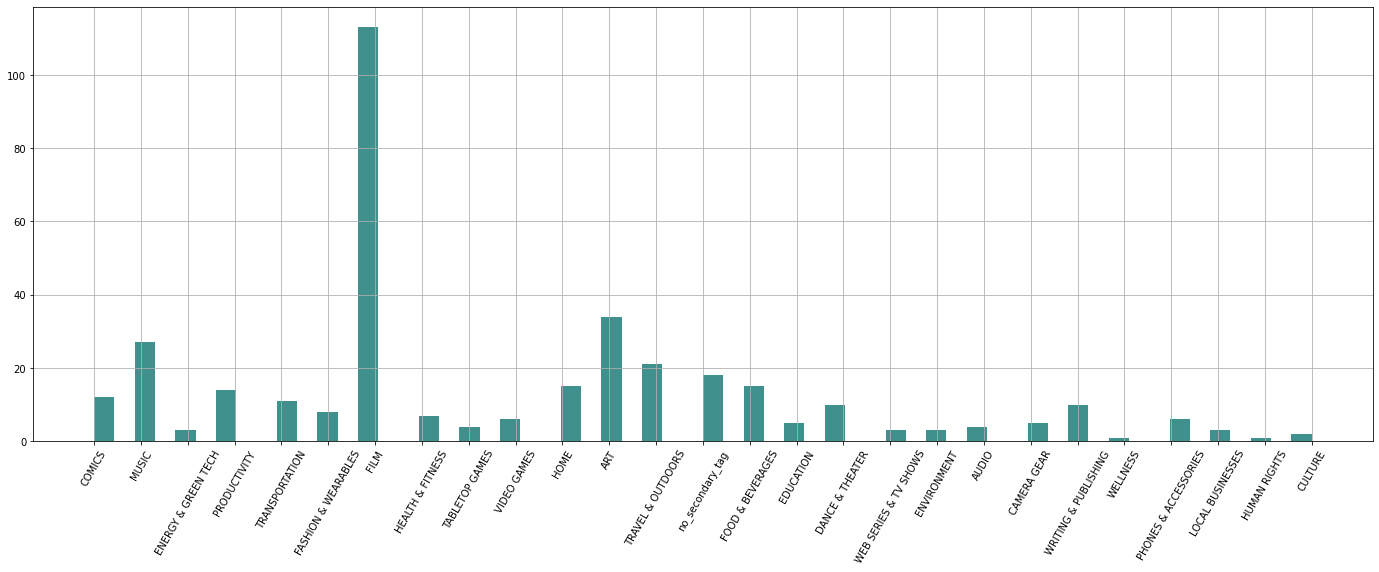

In [56]:
# Checking number of data per secondary_tag
print(df['secondary_tag'].value_counts())
plt.xticks(rotation=60)
df['secondary_tag'].hist(bins=60, figsize=(24,8), color='#40908e')
plt.show()

In [57]:
# Fitting One-way ANOVA linear model for testing H0 using the 'ols' class from the smf (statsmodels.formula.api) package
secondary_tag_lm = smf.ols('references_binary ~ secondary_tag', data = df).fit()

# Creating the anova table using the stats.anova_lm method from the sm (statsmodels.api) package
anova_table = sm.stats.anova_lm(secondary_tag_lm)
print(anova_table)

                  df     sum_sq   mean_sq         F    PR(>F)
secondary_tag   26.0   6.713680  0.258218  1.352709  0.120057
Residual       334.0  63.757235  0.190890       NaN       NaN


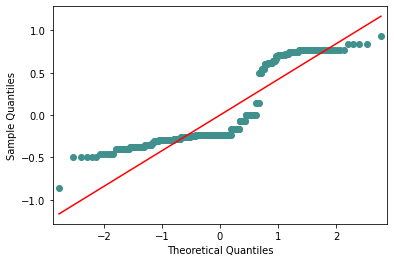

In [58]:
# Using the inbuild residual function from the 'ols' class
residuals = secondary_tag_lm.resid
# Using statsmodels.api qqplot method
sm.qqplot(residuals, stats.norm, line = 's', markerfacecolor='#40908e', markeredgecolor='#40908e') 
plt.show()

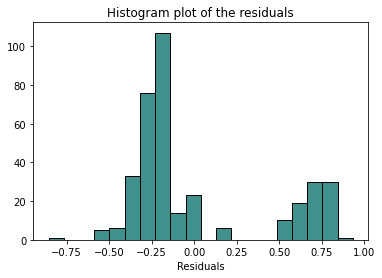

In [59]:
# Histogram plot of the residuals
plt.hist(residuals, bins = 20, facecolor = '#40908e', edgecolor = 'k')
plt.title('Histogram plot of the residuals')
plt.xlabel('Residuals')
plt.show()

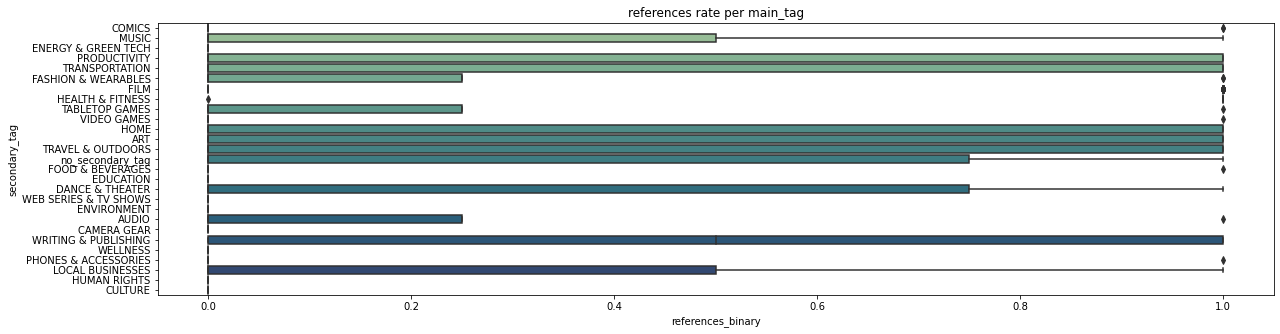

In [60]:
# Visually analyze the num_references of the secondary_tags using boxplots
fig = plt.subplots(figsize=(20,5))
sns.boxplot(x = 'references_binary', y = 'secondary_tag', data= df, palette="crest")
plt.title('references rate per main_tag')
plt.show()

### Equal variance: hypothesis testing

Since the data is not normally distributed, we will use the Levene's test.

In [61]:
print(df['secondary_tag'].nunique())

27


In [62]:
# Getting data for each secondary_tag
secondary_tag_1 = df[df['secondary_tag'] == 'TRAVEL & OUTDOORS']['references_binary'].values
secondary_tag_2 = df[df['secondary_tag'] == 'FILM']['references_binary'].values
secondary_tag_3 = df[df['secondary_tag'] == 'ART']['references_binary'].values
secondary_tag_4 = df[df['secondary_tag'] == 'HEALTH & FITNESS']['references_binary'].values
secondary_tag_5 = df[df['secondary_tag'] == 'CAMERA GEAR']['references_binary'].values
secondary_tag_6 = df[df['secondary_tag'] == 'DANCE & THEATER']['references_binary'].values
secondary_tag_7 = df[df['secondary_tag'] == 'FOOD & BEVERAGES']['references_binary'].values
secondary_tag_8 = df[df['secondary_tag'] == 'VIDEO GAMES']['references_binary'].values
secondary_tag_9 = df[df['secondary_tag'] == 'WRITING & PUBLISHING']['references_binary'].values
secondary_tag_10 = df[df['secondary_tag'] == 'COMICS']['references_binary'].values
secondary_tag_11 = df[df['secondary_tag'] == 'HOME']['references_binary'].values
secondary_tag_12 = df[df['secondary_tag'] == 'TRANSPORTATION']['references_binary'].values
secondary_tag_13 = df[df['secondary_tag'] == 'MUSIC']['references_binary'].values
secondary_tag_14 = df[df['secondary_tag'] == 'LOCAL BUSINESSES']['references_binary'].values
secondary_tag_15 = df[df['secondary_tag'] == 'WEB SERIES & TV SHOWS']['references_binary'].values
secondary_tag_16 = df[df['secondary_tag'] == 'EDUCATION']['references_binary'].values
secondary_tag_17 = df[df['secondary_tag'] == 'PRODUCTIVITY']['references_binary'].values
secondary_tag_18 = df[df['secondary_tag'] == 'FASHION & WEARABLES']['references_binary'].values
secondary_tag_19 = df[df['secondary_tag'] == 'TABLETOP GAMES']['references_binary'].values
secondary_tag_20 = df[df['secondary_tag'] == 'HUMAN RIGHTS']['references_binary'].values
secondary_tag_21 = df[df['secondary_tag'] == 'CULTURE']['references_binary'].values
secondary_tag_22 = df[df['secondary_tag'] == 'ENERGY & GREEN TECH']['references_binary'].values
secondary_tag_23 = df[df['secondary_tag'] == 'PHONES & ACCESSORIES']['references_binary'].values
secondary_tag_24 = df[df['secondary_tag'] == 'AUDIO']['references_binary'].values
secondary_tag_25 = df[df['secondary_tag'] == 'ENVIRONMENT']['references_binary'].values
secondary_tag_26 = df[df['secondary_tag'] == 'WELLNESS']['references_binary'].values


In [63]:
# Performing the Levene's test
statistic_levene, p_levene = stats.levene(secondary_tag_1, secondary_tag_2, secondary_tag_3, secondary_tag_4, secondary_tag_5, secondary_tag_6, secondary_tag_7, secondary_tag_8, secondary_tag_9,
                                          secondary_tag_10, secondary_tag_11, secondary_tag_12, secondary_tag_13, secondary_tag_14, secondary_tag_15, secondary_tag_16, secondary_tag_17, secondary_tag_18,
                                          secondary_tag_19, secondary_tag_20, secondary_tag_21, secondary_tag_22, secondary_tag_23, secondary_tag_24, secondary_tag_25, secondary_tag_26)
print("The result off the Levene's test is: ", p_levene)

if p_levene < 0.05:
    print('The null hypothesis that all input samples are from populations with equal variances is rejected')
else:
    print('We fail to reject the null hypothesis that all median num_references values from the secondary_tags have equal variances')

The result off the Levene's test is:  0.5439868387327076
We fail to reject the null hypothesis that all median num_references values from the secondary_tags have equal variances


### Non parametric method for one-way ANOVA: Kruskal-Wallis H test

In [64]:
# Now we will test the if there is association between num_references and the nominal categorical variables.
# We will use the non-parametric Kruskal-Wallis H test
alpha = 0.05
test_stat, p_val = stats.kruskal(secondary_tag_1, secondary_tag_2, secondary_tag_3, secondary_tag_4, secondary_tag_5, secondary_tag_6, secondary_tag_7, secondary_tag_8, secondary_tag_9,
                                 secondary_tag_10, secondary_tag_11, secondary_tag_12, secondary_tag_13, secondary_tag_14, secondary_tag_15, secondary_tag_16, secondary_tag_17, secondary_tag_18,
                                 secondary_tag_19, secondary_tag_20, secondary_tag_21, secondary_tag_22, secondary_tag_23, secondary_tag_24, secondary_tag_25, secondary_tag_26)
print('The p-value for Kruskal-Wallis H test is:', p_val)

if p_val <= alpha:
    print('We reject the null hypothesis that the median num_references rate of all the secondary_tags are equal at significance level = {}'.format(alpha))
else:
    print('We fail to reject the null hypothesis that the median num_references rate of all the secondary_tags are equal at significance level = {}'.format(alpha))

The p-value for Kruskal-Wallis H test is: 0.10105157157497814
We fail to reject the null hypothesis that the median num_references rate of all the secondary_tags are equal at significance level = 0.05


In [65]:
from statsmodels.stats.multicomp import MultiComparison

# Creating a class instance
mc = MultiComparison(df['num_references'], df['main_tag'])

#Applying the .allpairtest class method to perform Bonferroni's test
bonferroni = mc.allpairtest(stats.ttest_ind, method='b')
print(bonferroni[0])

Test Multiple Comparison ttest_ind 
FWER=0.05 method=b
alphacSidak=0.02, alphacBonf=0.017
      group1             group2        stat   pval  pval_corr reject
--------------------------------------------------------------------
COMMUNITY PROJECTS    CREATIVE WORKS -1.3391  0.182     0.546  False
COMMUNITY PROJECTS TECH & INNOVATION -1.8124 0.0718    0.2154  False
    CREATIVE WORKS TECH & INNOVATION -1.3066 0.1922    0.5766  False
--------------------------------------------------------------------


**Bonferroni's test analysis**

- Since the number of secondary tags are too large for the bonferroni method, we will use the main tags to perform the pairwise t-tests.
- The new $\alpha$ given by the test will be $\alpha$ Bonf 0.017. Looking at the p-values of each pairs we see that there are a higher number of pairs that reject the null hypothesis, thus we conclude to reject the null hypothesis.
- Given that the Bonferroni correction has been used to guard against Type 1 errors, we can be more confident in rejecting the null hypothesis of no significant differences across the project categories.

## <span style='color:#40908e'>|</span> 6.2) One-Way ANOVA Funding Mechanisms

not_available    213
Flexible Goal    146
Fixed Goal         2
Name: goal_type, dtype: int64


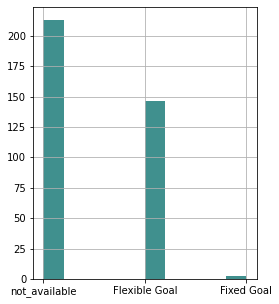

In [66]:
# Checking number of data per main_tag
print(df['goal_type'].value_counts())
df['goal_type'].hist(figsize=(4,5), color='#40908e')
plt.show()

In [67]:
#Fitting One-way ANOVA linear model for testing H0 using the 'ols' class from the smf (statsmodels.formula.api) package
goal_type_clusters_lm = smf.ols('references_binary ~ goal_type', data = df).fit()

#Creating the anova table using the stats.anova_lm method from the sm (statsmodels.api) package
anova_table = sm.stats.anova_lm(goal_type_clusters_lm)
print(anova_table)

              df     sum_sq   mean_sq         F    PR(>F)
goal_type    2.0   0.358206  0.179103  0.914511  0.401646
Residual   358.0  70.112708  0.195846       NaN       NaN


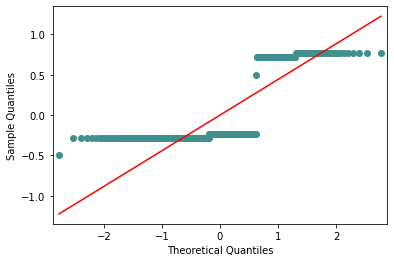

In [68]:
# using the inbuild residual function from the 'ols' class
residuals = goal_type_clusters_lm.resid
# using statsmodels.api (sm) qqplot method
sm.qqplot(residuals, stats.norm, line = 's', markerfacecolor='#40908e', markeredgecolor='#40908e') 
plt.show()

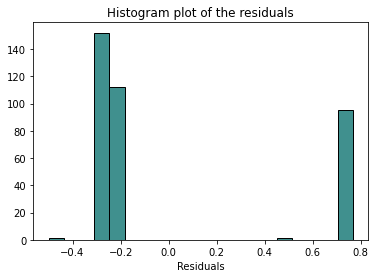

In [69]:
# Histogram plot of the residuals
plt.hist(residuals, bins = 20, facecolor = '#40908e', edgecolor = 'k')
plt.title('Histogram plot of the residuals')
plt.xlabel('Residuals')
plt.show()

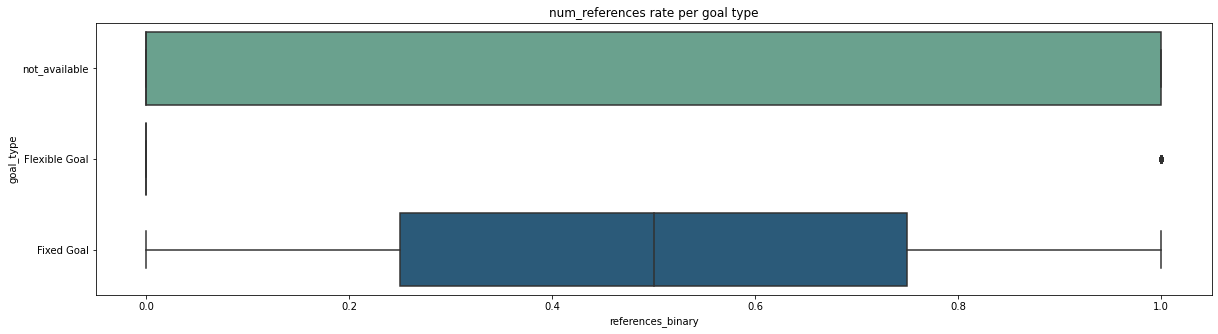

In [70]:
# Visually analyze the num_references of the goal types using boxplots
fig = plt.subplots(figsize=(20,5))
sns.boxplot(x = 'references_binary', y = 'goal_type', data= df, palette="crest")
plt.title('num_references rate per goal type')
plt.show()

### Equal variance: hypothesis testing

Since the data is not normally distributed, we will use the Levene's test.

In [71]:
# Getting data for each main_tag
goal_1 = df[df['goal_type'] == 'Flexible Goal']['references_binary'].values
goal_2 = df[df['goal_type'] == 'Fixed Goal']['references_binary'].values

In [72]:
# Performing the Levene's test
statistic_levene, p_levene = stats.levene(goal_1, goal_2)
print("The result off the Levene's test is: ", p_levene)

if p_levene < 0.05:
    print('The null hypothesis that all input samples are from populations with equal variances is REJECTED')
else:
    print('We FAIL to REJECT the null hypothesis that all median num_references values from the goal types have equal variances')

The result off the Levene's test is:  0.3761506996116948
We FAIL to REJECT the null hypothesis that all median num_references values from the goal types have equal variances


### Non parametric method for one-way ANOVA: Kruskal-Wallis H test

In [73]:
# Now we will test the if there is association between num_references and the nominal categorical variables.
# We will use the non-parametric Kruskal-Wallis H test
alpha = 0.05
test_stat, p_val = stats.kruskal(goal_1, goal_2)
print('The p-value for Kruskal-Wallis H test is:', p_val)

if p_val <= alpha:
    print('We reject the null hypothesis that the median num_references rate of all the main_tags are equal at significance level = {}'.format(alpha))
else:
    print('We fail to reject the null hypothesis that the median num_references rate of all the goal types are equal at significance level = {}'.format(alpha))

The p-value for Kruskal-Wallis H test is: 0.37885280213868366
We fail to reject the null hypothesis that the median num_references rate of all the goal types are equal at significance level = 0.05


### Post hoc method: Bonferroni's test
- One-way ANOVA tells us that the means of different groups are all equal or not equal, but the test gives no information about how they differ, in particular about which pairs are significantly different.

- Bonferroni's test: Performs pair-wise $t$-tests for $k$ null hypoethesis and gaurantees an overall Type I error rate of $\alpha$ by testing each null
hypothesis at a significance level of $\alpha/k$.

- The output from this method tells us whether to reject or fail to reject the pair-wise t-tests.

In [74]:
from statsmodels.stats.multicomp import MultiComparison

# Creating a class instance
mc = MultiComparison(df['num_references'], df['goal_type'])

#Applying the .allpairtest class method to perform Bonferroni's test
bonferroni = mc.allpairtest(stats.ttest_ind, method='b')
print(bonferroni[0])

Test Multiple Comparison ttest_ind 
FWER=0.05 method=b
alphacSidak=0.02, alphacBonf=0.017
    group1        group2      stat   pval  pval_corr reject
-----------------------------------------------------------
   Fixed Goal Flexible Goal  0.7164 0.4749       1.0  False
   Fixed Goal not_available  0.4984 0.6187       1.0  False
Flexible Goal not_available -1.1235  0.262    0.7859  False
-----------------------------------------------------------


**Bonferroni's test analysis**

- The new $\alpha$ given by the test will be $\alpha$ Bonf 0.017. Looking at the p-values of each pairs we can conclude that we FAILED to reject the null hypothesis.
- Given that the Bonferroni correction has been used to guard against Type 1 errors, we can be more confident in FAILING to reject the null hypothesis of no significant differences across the funding meachnisms.

# <span style='color:#40908e'>|</span> 7) Multilevel

In [75]:
df.describe()

,percentage_decimal,backers_numeric,campaigns_numeric,funded_numeric,days_numeric,success,num_references,references_binary,percentage_decimal_standardized,backers_numeric_standardized,funded_numeric_standardized
count,361.000000,361.000000,361.000000,3.610000e+02,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,1.523712,156.362881,3.268698,2.004767e+05,0.675900,0.645429,0.290859,0.265928,0.602535,3.835971,9.935924
std,8.809414,230.735030,5.106895,6.090599e+05,1.621968,0.479047,0.506787,0.442439,0.434934,1.770200,2.235283
min,0.000000,1.000000,1.000000,9.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,4.605170
25%,0.520000,12.000000,1.000000,4.169000e+03,0.000000,0.000000,0.000000,0.000000,0.418710,2.564949,8.335671
50%,1.000000,52.000000,1.000000,1.423100e+04,0.000000,1.000000,0.000000,0.000000,0.693147,3.970292,9.563248
75%,1.000000,166.000000,3.000000,1.249850e+05,0.000000,1.000000,1.000000,1.000000,0.693147,5.117994,11.735957
max,153.590000,983.000000,43.000000,4.990870e+06,7.000000,1.000000,2.000000,1.000000,5.040776,6.891626,15.423121


## <span style='color:#40908e'>|</span> 7.1) Multilevel Project Category

In [76]:
# Create new dataframe to filter out unrelevant values
category_df = df[df['secondary_tag'] != 'no_secondary_tag'].copy()

In [77]:
# Building the multilevel linear regression model
lmer_model = Lmer('funded_numeric_standardized ~ 1 + references_binary + (1 + references_binary|secondary_tag)', data=category_df) 
display(lmer_model.fit())

boundary (singular) fit: see help('isSingular') 

Formula: funded_numeric_standardized~1+references_binary+(1+references_binary|secondary_tag)

Family: gaussian	 Inference: parametric

Number of observations: 343	 Groups: {'secondary_tag': 26.0}

Log-likelihood: -679.309 	 AIC: 1358.618

Random effects:

                            Name    Var    Std
secondary_tag        (Intercept)  3.246  1.802
secondary_tag  references_binary  0.004  0.066
Residual                          2.581  1.607

                       IV1                IV2  Corr
secondary_tag  (Intercept)  references_binary  -1.0

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),10.029,9.277,10.78,0.384,22.001,26.149,0.000,***
references_binary,0.367,-0.037,0.77,0.206,311.366,1.781,0.076,.


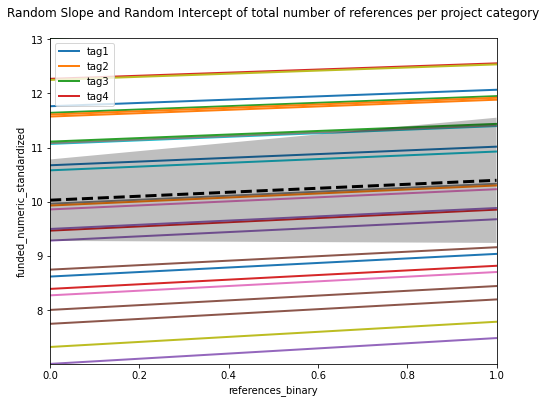

In [78]:
Lmer.plot(lmer_model, param = "references_binary").legend(['tag1', 'tag2', 'tag3', 'tag4'])
plt.title("Random Slope and Random Intercept of total number of references per project category\n")
plt.show()

In [79]:
#computing the betas
betas = lmer_model.fixef
print(betas)

                       (Intercept)  references_binary
ART                      10.672836           0.343369
AUDIO                    11.571885           0.310681
CAMERA GEAR              13.026091           0.257810
COMICS                    9.466742           0.387220
CULTURE                   9.497879           0.386087
DANCE & THEATER           8.003995           0.440402
EDUCATION                 9.857994           0.372995
ENERGY & GREEN TECH       9.962619           0.369191
ENVIRONMENT               7.320218           0.465262
FASHION & WEARABLES      11.066570           0.329054
FILM                      8.619519           0.418023
FOOD & BEVERAGES          9.929720           0.370387
HEALTH & FITNESS         11.640465           0.308188
HOME                     12.267975           0.285373
HUMAN RIGHTS              9.282797           0.393907
LOCAL BUSINESSES          7.747487           0.449728
MUSIC                     8.272575           0.430637
PHONES & ACCESSORIES     11.

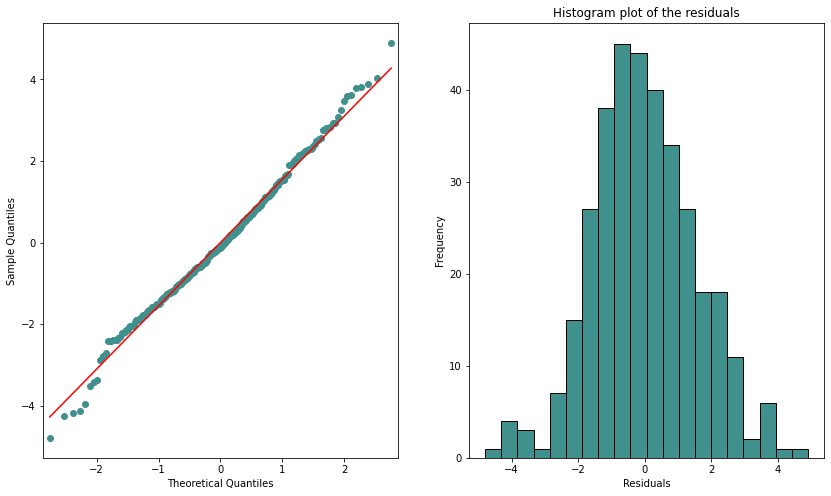

In [80]:
# Extracting residuals and visualize it
residuals = lmer_model.residuals

fig, axes = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(14)

sm.qqplot(residuals, stats.norm, line = 's', ax= axes[0], markerfacecolor='#40908e', markeredgecolor='#40908e')

axes[1].hist(residuals, bins = 20, facecolor = '#40908e', edgecolor = 'k')
plt.title('Histogram plot of the residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.show()

## <span style='color:#40908e'>|</span> 7.2) Multilevel Funding Mechanisms

In [81]:
# Create new dataframe to filter out unrelevant values
goal_df = df[df['goal_type'].isin(['Fixed Goal', 'Flexible Goal'])].copy()

In [82]:
# We already saw in the EDA that the number of fixed goal are too low to have a reliable multilevel analysis on it
goal_df['goal_type'].value_counts()

Flexible Goal    146
Fixed Goal         2
Name: goal_type, dtype: int64

In [83]:
# Building the multilevel linear regression model
lmer_model2 = Lmer('funded_numeric_standardized ~ 1 + references_binary + (1 + references_binary|goal_type)', data=goal_df) 
display(lmer_model2.fit())

boundary (singular) fit: see help('isSingular') 

Formula: funded_numeric_standardized~1+references_binary+(1+references_binary|goal_type)

Family: gaussian	 Inference: parametric

Number of observations: 148	 Groups: {'goal_type': 2.0}

Log-likelihood: -260.794 	 AIC: 521.587

Random effects:

                        Name    Var    Std
goal_type        (Intercept)  0.816  0.903
goal_type  references_binary  0.148  0.385
Residual                      1.953  1.398

                   IV1                IV2  Corr
goal_type  (Intercept)  references_binary   1.0

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),8.659,7.221,10.097,0.734,0.354,11.803,0.283,
references_binary,0.622,-0.169,1.412,0.403,0.115,1.542,0.779,


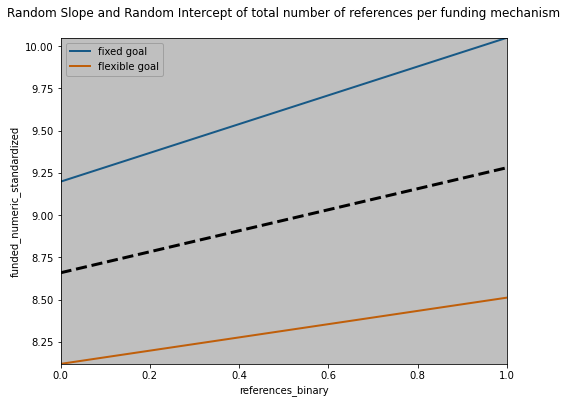

In [84]:
Lmer.plot(lmer_model2, param = "references_binary").legend(['fixed goal', 'flexible goal'])
plt.title("Random Slope and Random Intercept of total number of references per funding mechanism\n")
plt.show()

In [85]:
#computing the betas
betas = lmer_model2.fixef
print(betas)

               (Intercept)  references_binary
Fixed Goal        9.197967           0.851510
Flexible Goal     8.119875           0.391974


In [86]:
# Extracting residuals and visualize it
residuals2 = lmer_model2.residuals

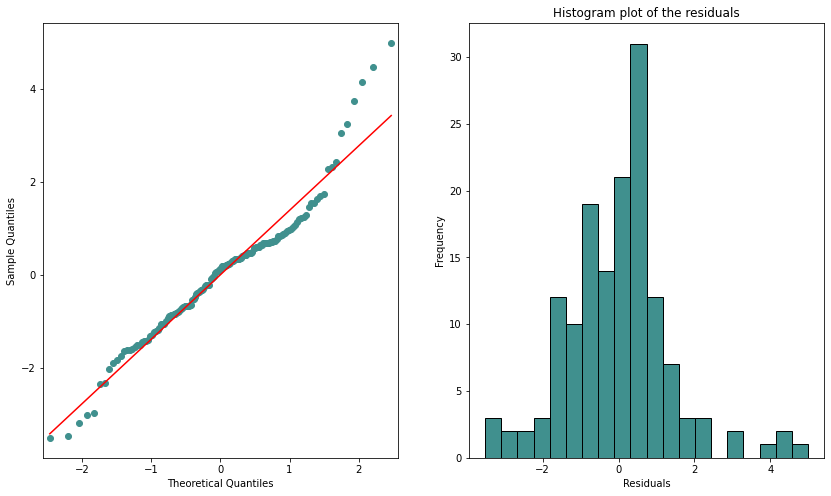

In [87]:
fig, axes = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(14)

sm.qqplot(residuals2, stats.norm, line = 's', ax= axes[0], markerfacecolor='#40908e', markeredgecolor='#40908e')

axes[1].hist(residuals2, bins = 20, facecolor = '#40908e', edgecolor = 'k')
plt.title('Histogram plot of the residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.show()

# <span style='color:#40908e'>|</span> 8) Sentiment Analysis

In [88]:
# Removing unrelevant text
patterns = ["You must be a backer to join the discussion. Log in or sign up.",
            "No Comments",
            "No discussion yet",
            "Log in or sign up to join the discussion"]

for pattern in patterns:
    df['discussion'] = df['discussion'].str.replace(pattern, "", regex=True)

# Replacing \n into white space
df['discussion'] = df['discussion'].str.replace(".\n", " ", regex=True)
df['discussion'] = df['discussion'].str.replace("\n", " ", regex=True)

In [89]:
# nltk.download('vader_lexicon') # rule-based feeling analysis instrument
sentiments = SentimentIntensityAnalyzer()

df['positive'] = [sentiments.polarity_scores(i)['pos'] for i in df['discussion']]
df['negative'] = [sentiments.polarity_scores(i)['neg'] for i in df['discussion']]
df['neutral'] = [sentiments.polarity_scores(i)['neu'] for i in df['discussion']]
df['compound'] = [sentiments.polarity_scores(i)['compound'] for i in df['discussion']]
score = df['compound'].values

sentiment = []
for i in score:
    if i >= 0.05:
        sentiment.append('positive')
    elif i <= -0.05:
        sentiment.append('negative')
    else:
        sentiment.append('neutral')
df['sentiment'] = sentiment 

In [95]:
print("Skewness of 'compound':", df['compound'].skew())

Skewness of 'compound': -0.14804770127798633


The average num_references: 0.2659279778393352
The average compound: 0.2721556786703601
B0 = 0.2405422641509434
B1 = [0.11887961]
Coefficient of Determination = 0.008235979571808216


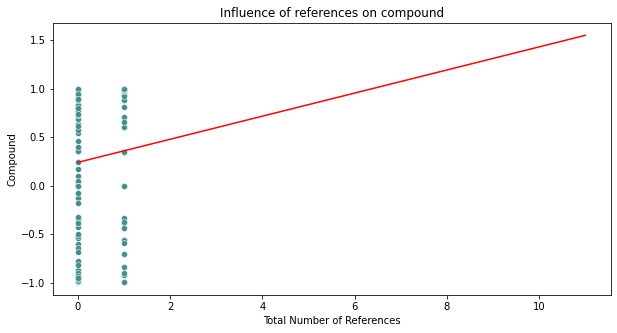

In [90]:
# Linear regression of the influence of references on positivity of comments
num_references = df.references_binary.to_list()
compound = df.compound.to_list()

Average_num_references = np.mean(num_references)
Average_compound = np.mean(compound)
print("The average num_references:", Average_num_references)
print("The average compound:",Average_compound)

# Using LinearRegression to calculate the B0, B1 and R-square
num_references_data = np.array(num_references).reshape((-1,1))
compound_data = np.array(compound)
model1 = LinearRegression().fit(num_references_data, compound_data)
b0 = model1.intercept_
b1 = model1.coef_
print("B0 =",b0)
print("B1 =",b1)
r_squared = model1.score(num_references_data, compound_data)
print("Coefficient of Determination =",r_squared)

# Plotting the graph
s = df
# s = df[df["percentage_decimal"] < 500000] # Code incase for outliers removal
x = np.linspace(0, 11, 100)
y = b0 + (b1*x)
plt.figure(figsize=(10,5))
sns.scatterplot(data = s, x = s["references_binary"], y = s["compound"], color='#40908e')
plt.plot(x, y, 'r',)
plt.xlabel("Total Number of References")
plt.ylabel("Compound")
plt.title("Influence of references on compound")

plt.show()

In [91]:
# Adding a constant term to the independent variable
num_references_data = sm.add_constant(num_references_data)

# Creating and fitting the OLS (Ordinary Least Squares) model
model = sm.OLS(compound_data, num_references_data)
results = model.fit()

# Accessing the p-value for the coefficient
p_value = results.pvalues[1]  # Assuming the coefficient you're interested in is at index 1

print("P-value:", p_value)

P-value: 0.08509338314116881


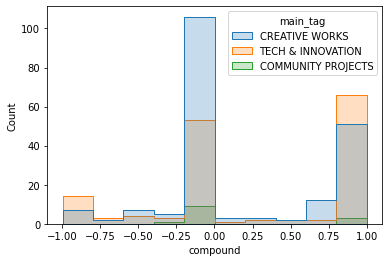

In [92]:
# Histogram of the compound scores with the main tags
sns.histplot(data=df, x="compound", hue="main_tag", element="step")
plt.show()